# PROJECT - CRIME AGAINST WOMEN IN INDIA 


In [16]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
crime= pd.read_csv('C:\\Users\\nainc\\OneDrive\\Desktop\\crimes_against_women_2001-2014.csv')

# Heads of DataFrame

In [5]:
crime.head()

Unnamed: 0        STATE/UT       DISTRICT  Year  Rape  \
0           0  ANDHRA PRADESH       ADILABAD  2001    50   
1           1  ANDHRA PRADESH      ANANTAPUR  2001    23   
2           2  ANDHRA PRADESH       CHITTOOR  2001    27   
3           3  ANDHRA PRADESH       CUDDAPAH  2001    20   
4           4  ANDHRA PRADESH  EAST GODAVARI  2001    23   

   Kidnapping and Abduction  Dowry Deaths  \
0                        30            16   
1                        30             7   
2                        34            14   
3                        20            17   
4                        26            12   

   Assault on women with intent to outrage her modesty  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     
4                                                109     

   Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   Importation of Girls  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

# Cell Information

In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


# Statistics of DataFrame

In [9]:
crime.describe().style.background_gradient(cmap='magma')

# List of Columns

In [11]:
crime.columns

Index(['Unnamed: 0', 'STATE/UT', 'DISTRICT', 'Year', 'Rape',
       'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

# Unique Features

In [13]:
crime.nunique()

Unnamed: 0                                             9017
STATE/UT                                                 72
DISTRICT                                               1605
Year                                                     14
Rape                                                    481
Kidnapping and Abduction                                555
Dowry Deaths                                            283
Assault on women with intent to outrage her modesty     649
Insult to modesty of Women                              381
Cruelty by Husband or his Relatives                     961
Importation of Girls                                     37
dtype: int64

# Missing values

In [15]:
crime.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

# Count of each Crime

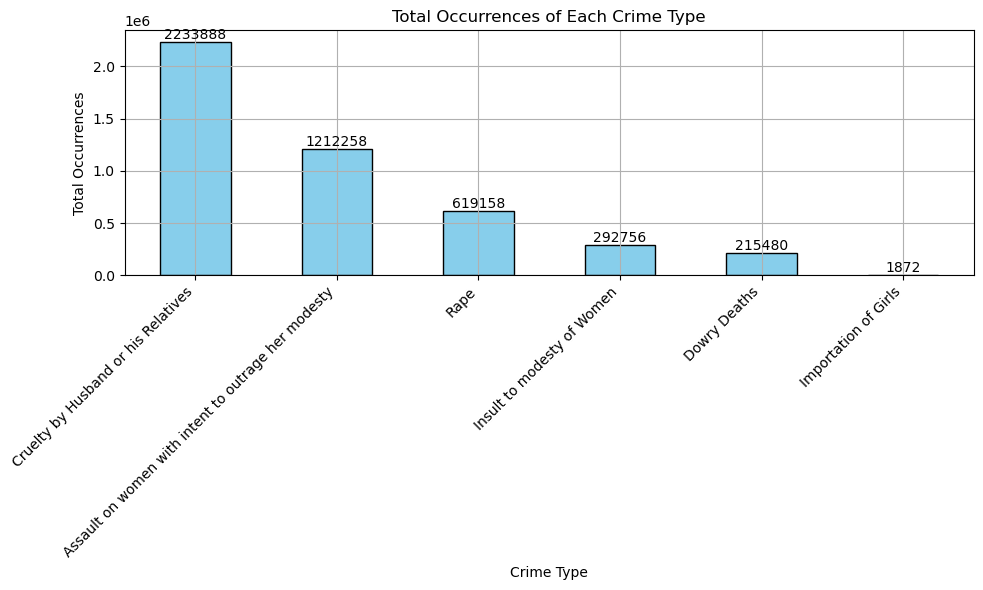

In [17]:
crime_counts = crime[['Rape', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
                     'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls']].sum()
crime_counts_sorted = crime_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = crime_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Crime Type')
plt.ylabel('Total Occurrences')
plt.title('Total Occurrences of Each Crime Type')
plt.grid(True)

# Positioning the x-axis labels below the bars
ax.set_xticklabels(crime_counts_sorted.index, rotation=45, ha='right')

for i, count in enumerate(crime_counts_sorted):
    ax.text(i, count + 1000, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Distribution of Highest Crime by Count

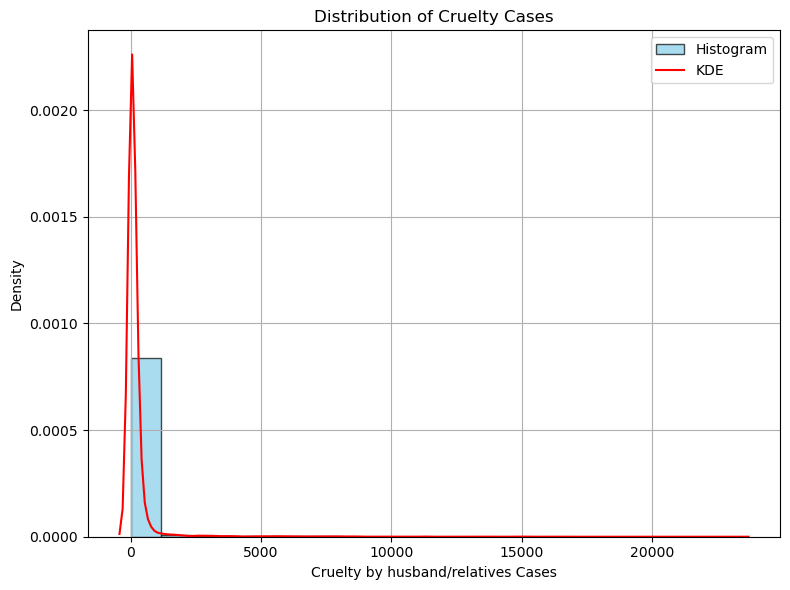

In [20]:
cruelty_data = crime['Cruelty by Husband or his Relatives']
plt.figure(figsize=(8, 6))
plt.hist(cruelty_data, bins=20, color='skyblue', edgecolor='black', density=True, alpha=0.7, label='Histogram')
sns.kdeplot(cruelty_data, color='red', label='KDE')
plt.xlabel('Cruelty by husband/relatives Cases')
plt.ylabel('Density')
plt.title('Distribution of Cruelty Cases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Count of Crimes Statewise

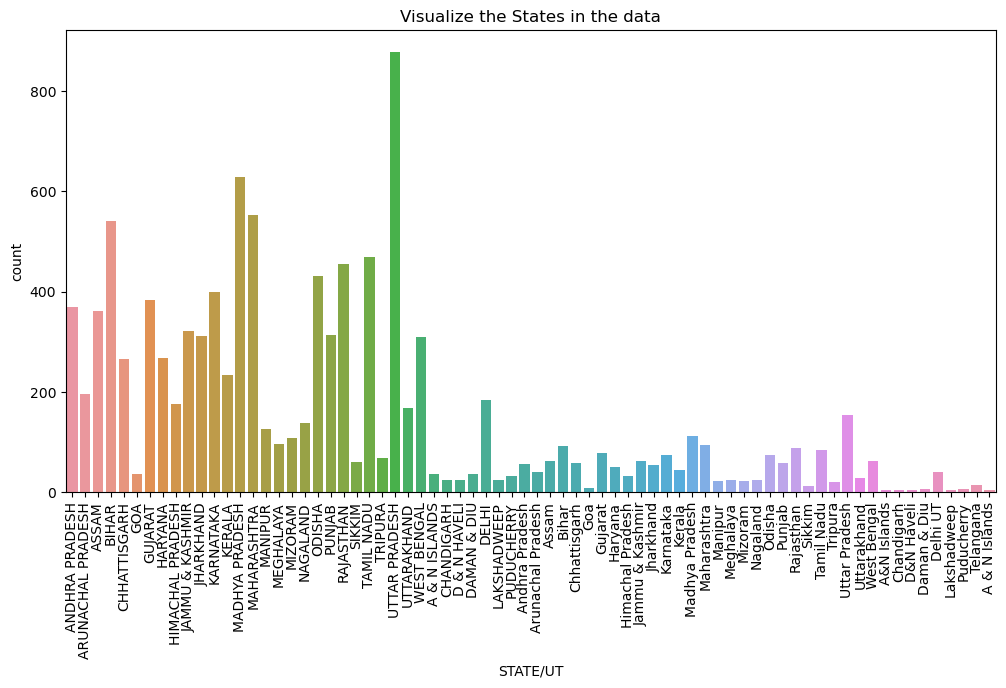

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(data=crime,x=crime['STATE/UT'])
plt.title("Visualize the States in the data")
plt.xticks(rotation=90)
plt.show()

# Count of Crimes Yearwise

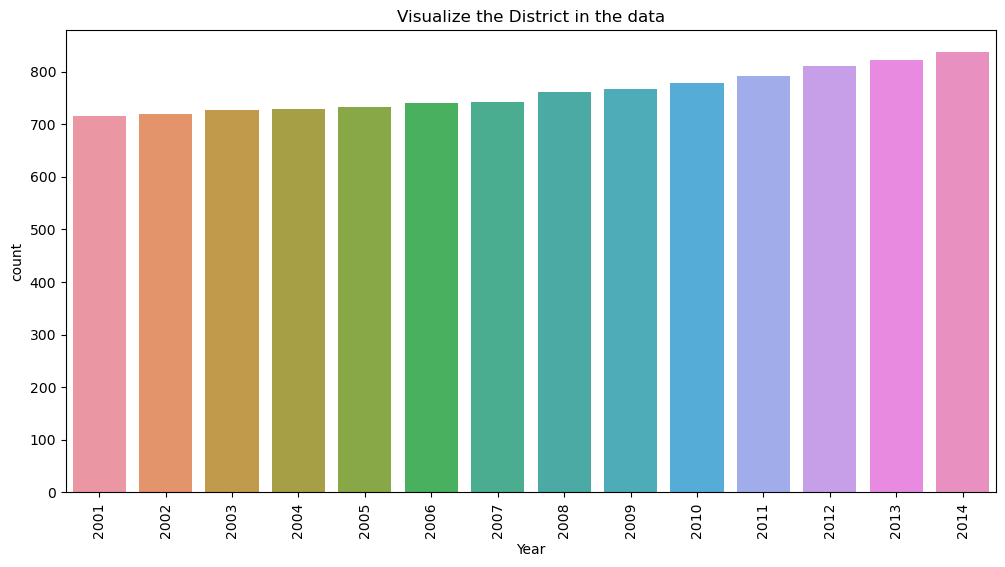

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=crime,x=crime['Year'])
plt.title("Visualize the District in the data")
plt.xticks(rotation=90)
plt.show()

# Top 10 Districts with Highest Crime Rate

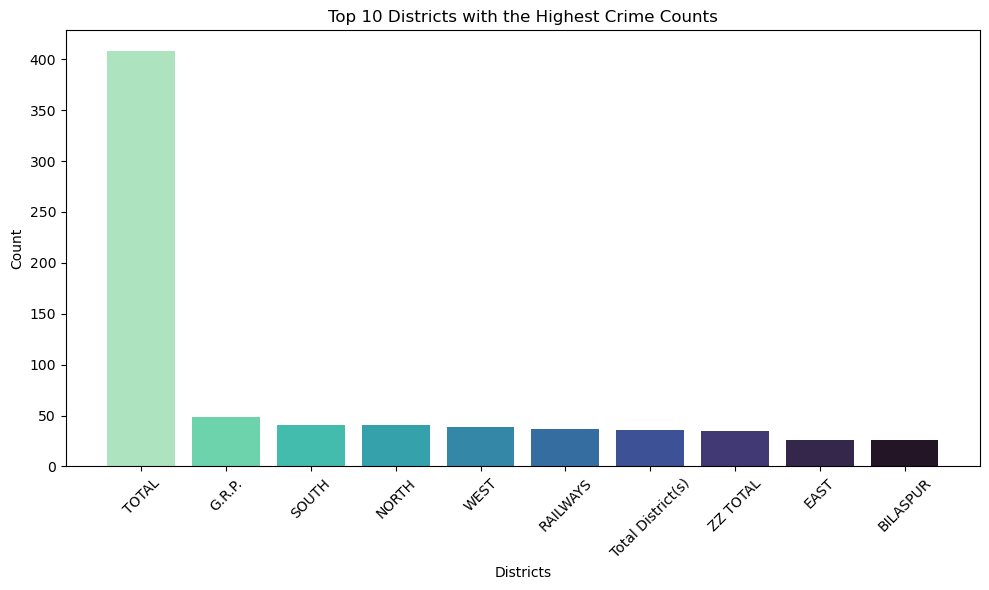

In [26]:
district_counts = crime['DISTRICT'].value_counts()
sorted_districts = district_counts.sort_values(ascending=False)
top_10_districts = sorted_districts.head(10)
sunset_palette = sns.color_palette("mako_r", n_colors=10) 
plt.figure(figsize=(10, 6))
plt.bar(top_10_districts.index, top_10_districts.values,color=sunset_palette)
plt.xlabel('Districts')
plt.ylabel('Count')
plt.title('Top 10 Districts with the Highest Crime Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Number of Crime Cases in Each State

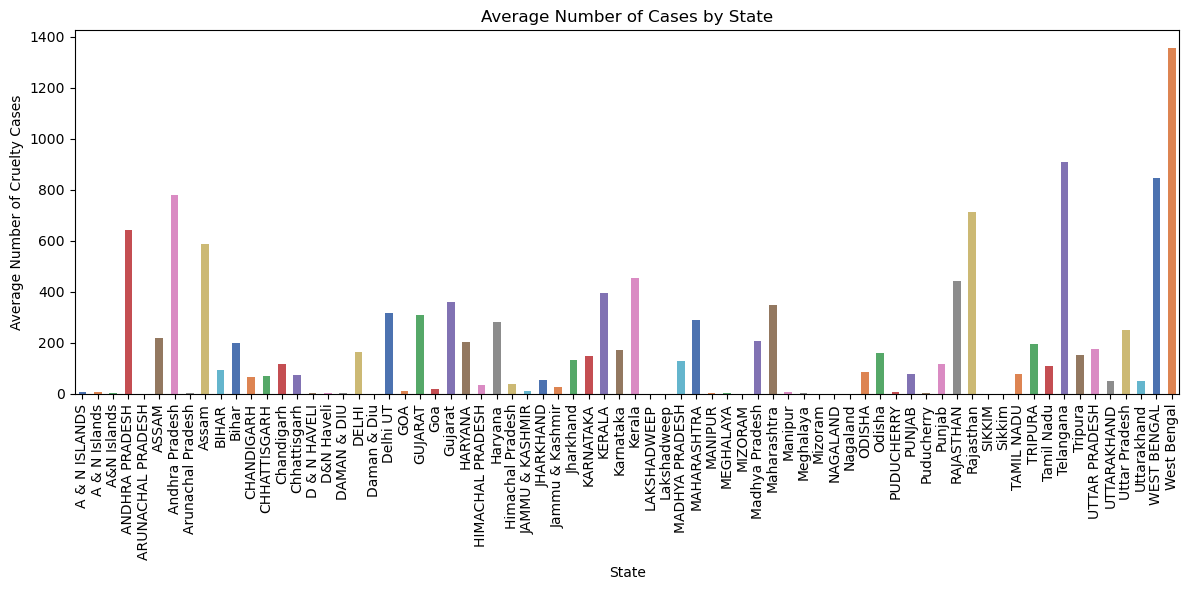

In [28]:
sunset_palette=sns.color_palette("deep", n_colors=10)
average_rape_by_state = crime.groupby('STATE/UT')['Cruelty by Husband or his Relatives'].mean()
plt.figure(figsize=(12, 6))
average_rape_by_state.plot(kind='bar',color=sunset_palette)
plt.xlabel('State')
plt.ylabel('Average Number of Cruelty Cases')
plt.title('Average Number of Cases by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Trend over the years

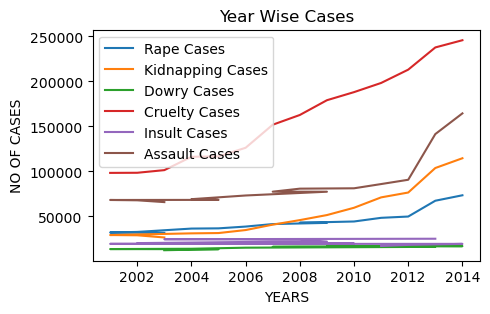

<Figure size 640x480 with 0 Axes>

In [41]:
year_rape=crime.groupby('Year')['Rape'].sum().sort_values(ascending=False)
year_kid=crime.groupby('Year')['Kidnapping and Abduction'].sum().sort_values(ascending=False)
year_dowry=crime.groupby('Year')['Dowry Deaths'].sum().sort_values(ascending=False)
year_cruelty=crime.groupby('Year')['Cruelty by Husband or his Relatives'].sum().sort_values(ascending=False)
year_insult=crime.groupby('Year')['Insult to modesty of Women'].sum().sort_values(ascending=False)
year_assault=crime.groupby('Year')['Assault on women with intent to outrage her modesty'].sum().sort_values(ascending=False)
plt.figure(figsize=(5,3))
plt.plot(year_rape,label='Rape Cases')
plt.plot(year_kid,label='Kidnapping Cases')
plt.plot(year_dowry,label='Dowry Cases')
plt.plot(year_cruelty,label='Cruelty Cases')
plt.plot(year_insult,label='Insult Cases')
plt.plot(year_assault,label='Assault Cases')
plt.title("Year Wise Cases")
plt.legend(loc='best')
plt.xlabel("YEARS")
plt.ylabel("NO OF CASES")
plt.show()
plt.tight_layout()

# Number of Rape Cases recorded Statewise

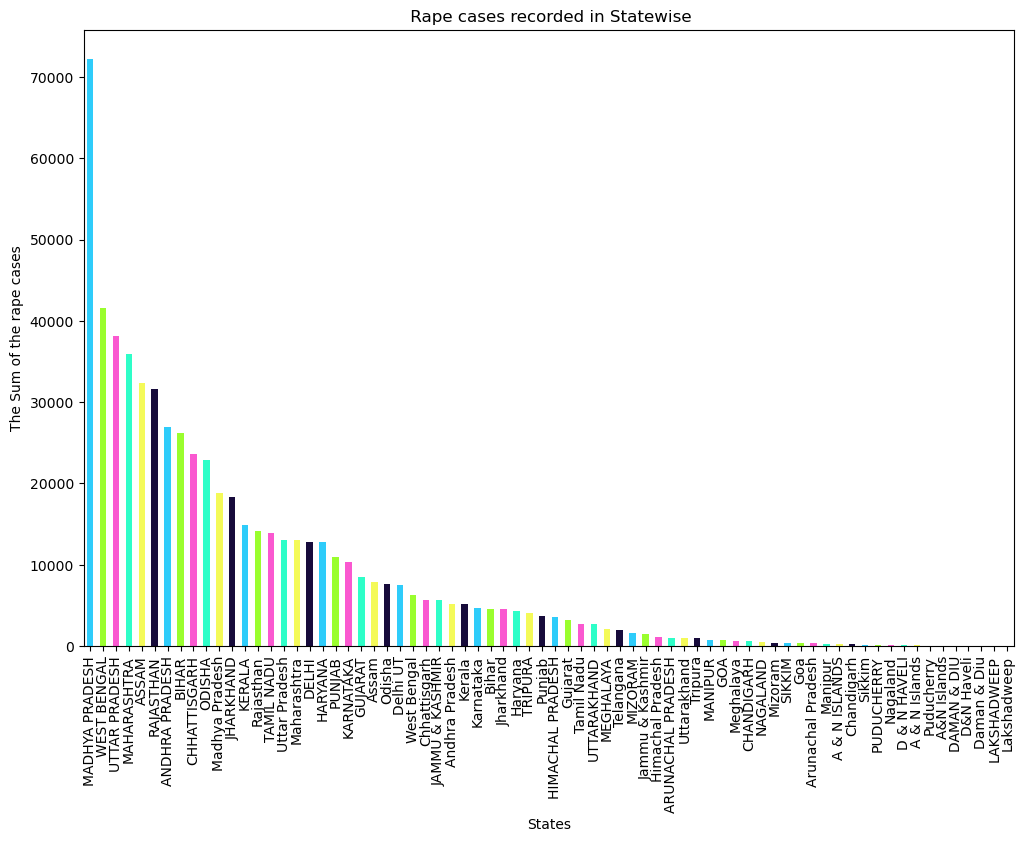

In [30]:
crime.groupby('STATE/UT')['Rape'].sum().sort_values(ascending=False).plot(kind='bar',color=['#2ECCFA','#9AFE2E','#FA58D0','#2EFEC8','#F4FA58','#170B3B'],figsize=(12,8))
plt.title(" Rape cases recorded in Statewise")
plt.xlabel("States")
plt.ylabel("The Sum of the rape cases")
plt.show()

# Comparison of Rape and Kidnapping\Abduction Cases recorded Statewise[heads35]

C:\Users\nainc\AppData\Local\Temp\ipykernel_24660\3622153396.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = crime.groupby('STATE/UT')['Rape','Kidnapping and Abduction'].sum().head(30)


<Figure size 2000x1000 with 0 Axes>

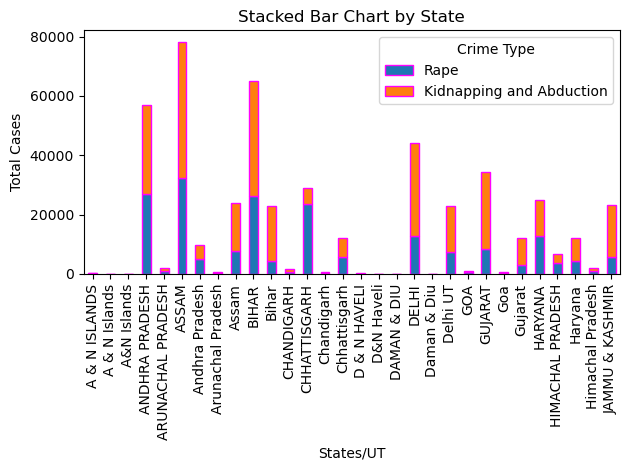

In [32]:
grouped_data = crime.groupby('STATE/UT')['Rape','Kidnapping and Abduction'].sum().head(30)


plt.figure(figsize=(20, 10))
grouped_data.plot(kind='bar', stacked=True, edgecolor='magenta')
plt.xlabel('States/UT')
plt.ylabel('Total Cases')
plt.title('Stacked Bar Chart by State')
plt.xticks(rotation=90)
plt.legend(title='Crime Type', loc='best')
plt.tight_layout()
plt.show()

# Number of Dowry Death Cases recorded Statewise

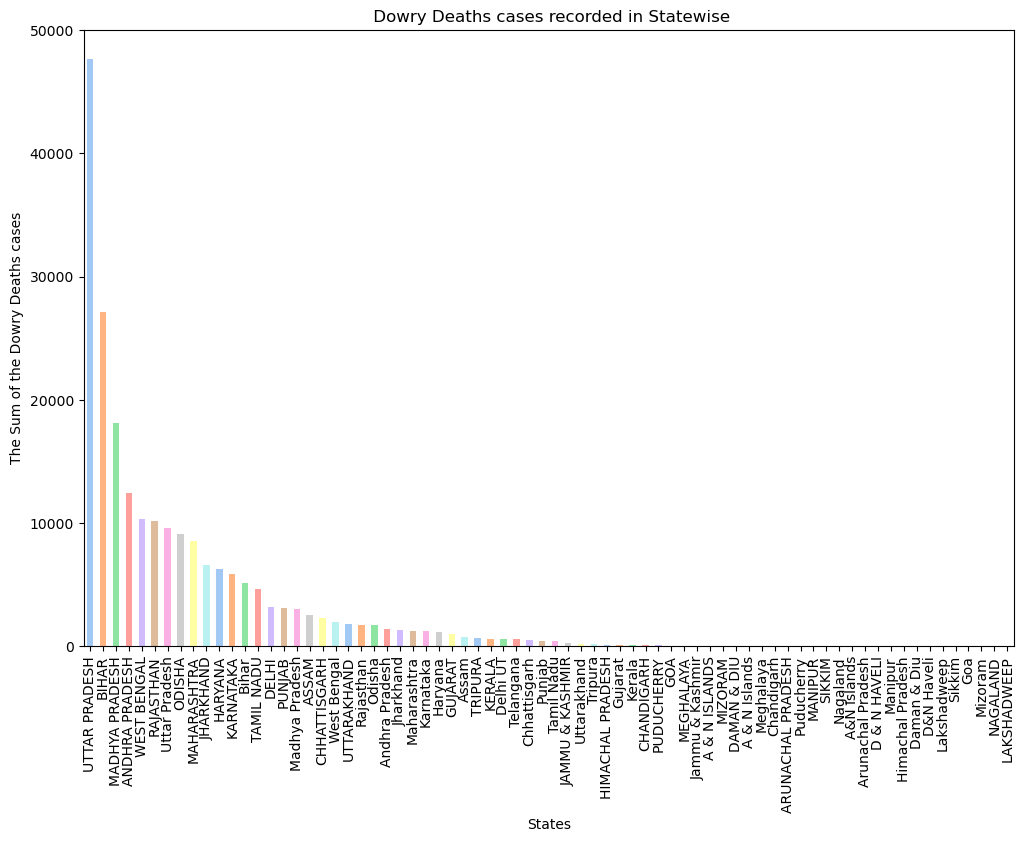

In [34]:
sunset_palette=sns.color_palette("pastel", n_colors=10)
crime.groupby('STATE/UT')['Dowry Deaths'].sum().sort_values(ascending=False).plot(kind='bar',color=sunset_palette,figsize=(12,8))
plt.title(" Dowry Deaths cases recorded in Statewise")
plt.xlabel("States")
plt.ylabel("The Sum of the Dowry Deaths cases")
plt.show()

# Comparison of Dowry and Assault Cases recorded Statewise[heads 35]

C:\Users\nainc\AppData\Local\Temp\ipykernel_24660\2975047259.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = crime.groupby('STATE/UT')['Dowry Deaths', 'Assault on women with intent to outrage her modesty'].sum().head(35)


<Figure size 2000x1000 with 0 Axes>

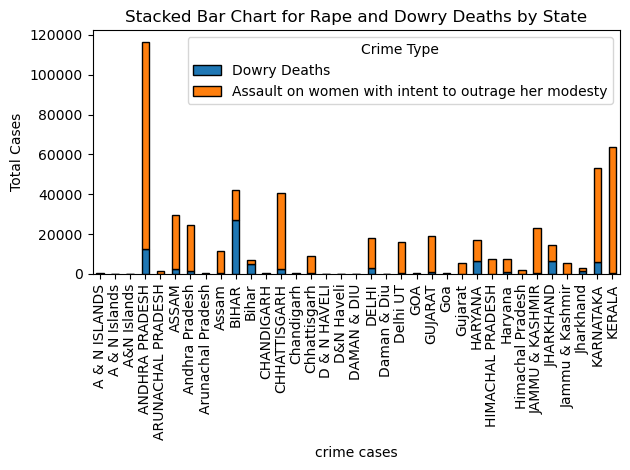

In [36]:
grouped_data = crime.groupby('STATE/UT')['Dowry Deaths', 'Assault on women with intent to outrage her modesty'].sum().head(35)
plt.figure(figsize=(20, 10))
grouped_data.plot(kind='bar', stacked=True, edgecolor='black')
plt.xlabel('crime cases')
plt.ylabel('Total Cases')
plt.title('Stacked Bar Chart for Rape and Dowry Deaths by State')
plt.xticks(rotation=90)
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()

# Number of Kidnapping and Abduction Cases recorded Yearwise

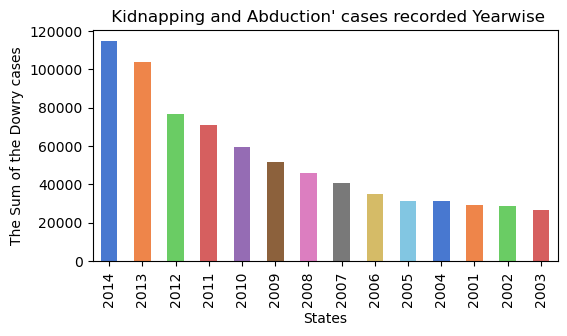

In [38]:
sunset_palette=sns.color_palette("muted", n_colors=10)
crime.groupby('Year')['Kidnapping and Abduction'].sum().sort_values(ascending=False)\
.plot(kind='bar',color=sunset_palette,figsize=(6,3))
plt.title(" Kidnapping and Abduction' cases recorded Yearwise")
plt.xlabel("States")
plt.ylabel("The Sum of the Dowry cases")
plt.show()

# Number of Assault on women with intent to outrage her modesty Cases recorded Yearwise

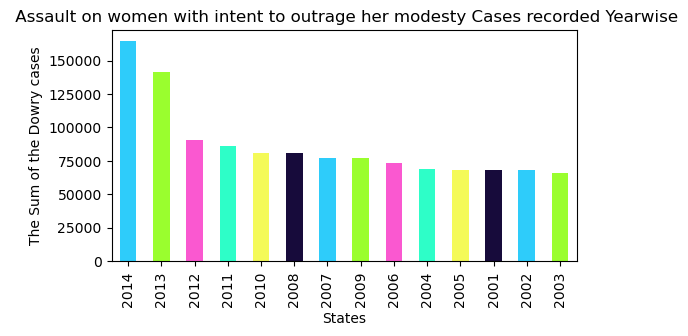

In [40]:
crime.groupby('Year')['Assault on women with intent to outrage her modesty'].sum().sort_values(ascending=False)\
.plot(kind='bar',color=['#2ECCFA','#9AFE2E','#FA58D0','#2EFEC8','#F4FA58','#170B3B'],figsize=(6,3))
plt.title(" Assault on women with intent to outrage her modesty Cases recorded Yearwise")
plt.xlabel("States")
plt.ylabel("The Sum of the Dowry cases")
plt.show()

# Correlation Plot

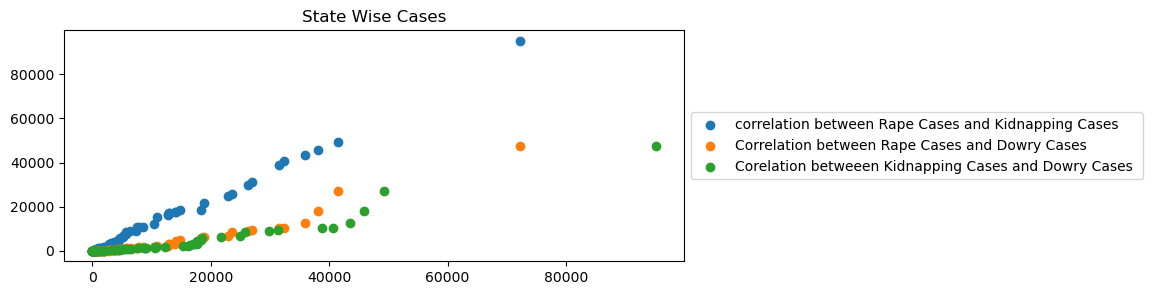

<Figure size 640x480 with 0 Axes>

In [44]:
state_rape=crime.groupby('STATE/UT')['Rape'].sum().sort_values(ascending=False)
state_kid=crime.groupby('STATE/UT')['Kidnapping and Abduction'].sum().sort_values(ascending=False)
state_dowry=crime.groupby('STATE/UT')['Dowry Deaths'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,3))
plt.scatter(state_rape,state_kid,label='correlation between Rape Cases and Kidnapping Cases')
plt.scatter(state_rape,state_dowry,label="Correlation between Rape Cases and Dowry Cases")
plt.scatter(state_kid,state_dowry,label="Corelation betweeen Kidnapping Cases and Dowry Cases ")


plt.title("State Wise Cases")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.tight_layout()

# Heatmap

C:\Users\nainc\AppData\Local\Temp\ipykernel_26640\244838367.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc=crime.corr()


<Axes: >

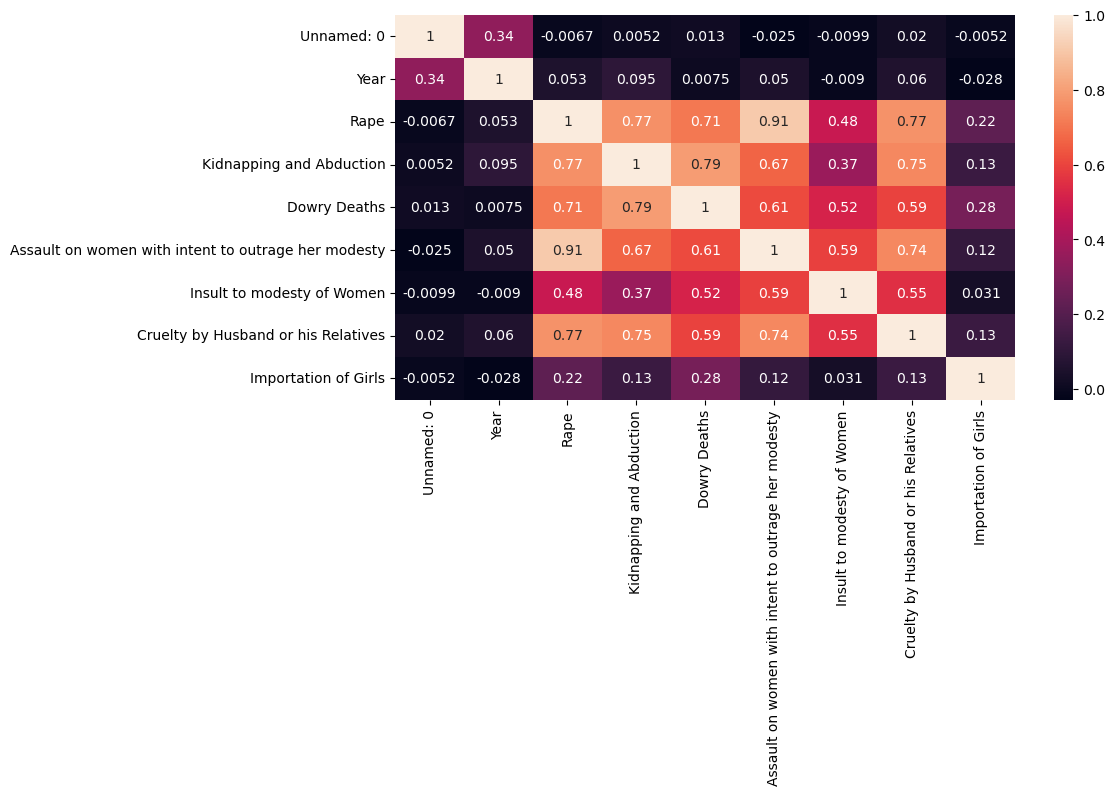

In [4]:
tc=crime.corr()
plt.figure(figsize=(10,5))
sns.heatmap(tc,annot=True)

# Pairplot

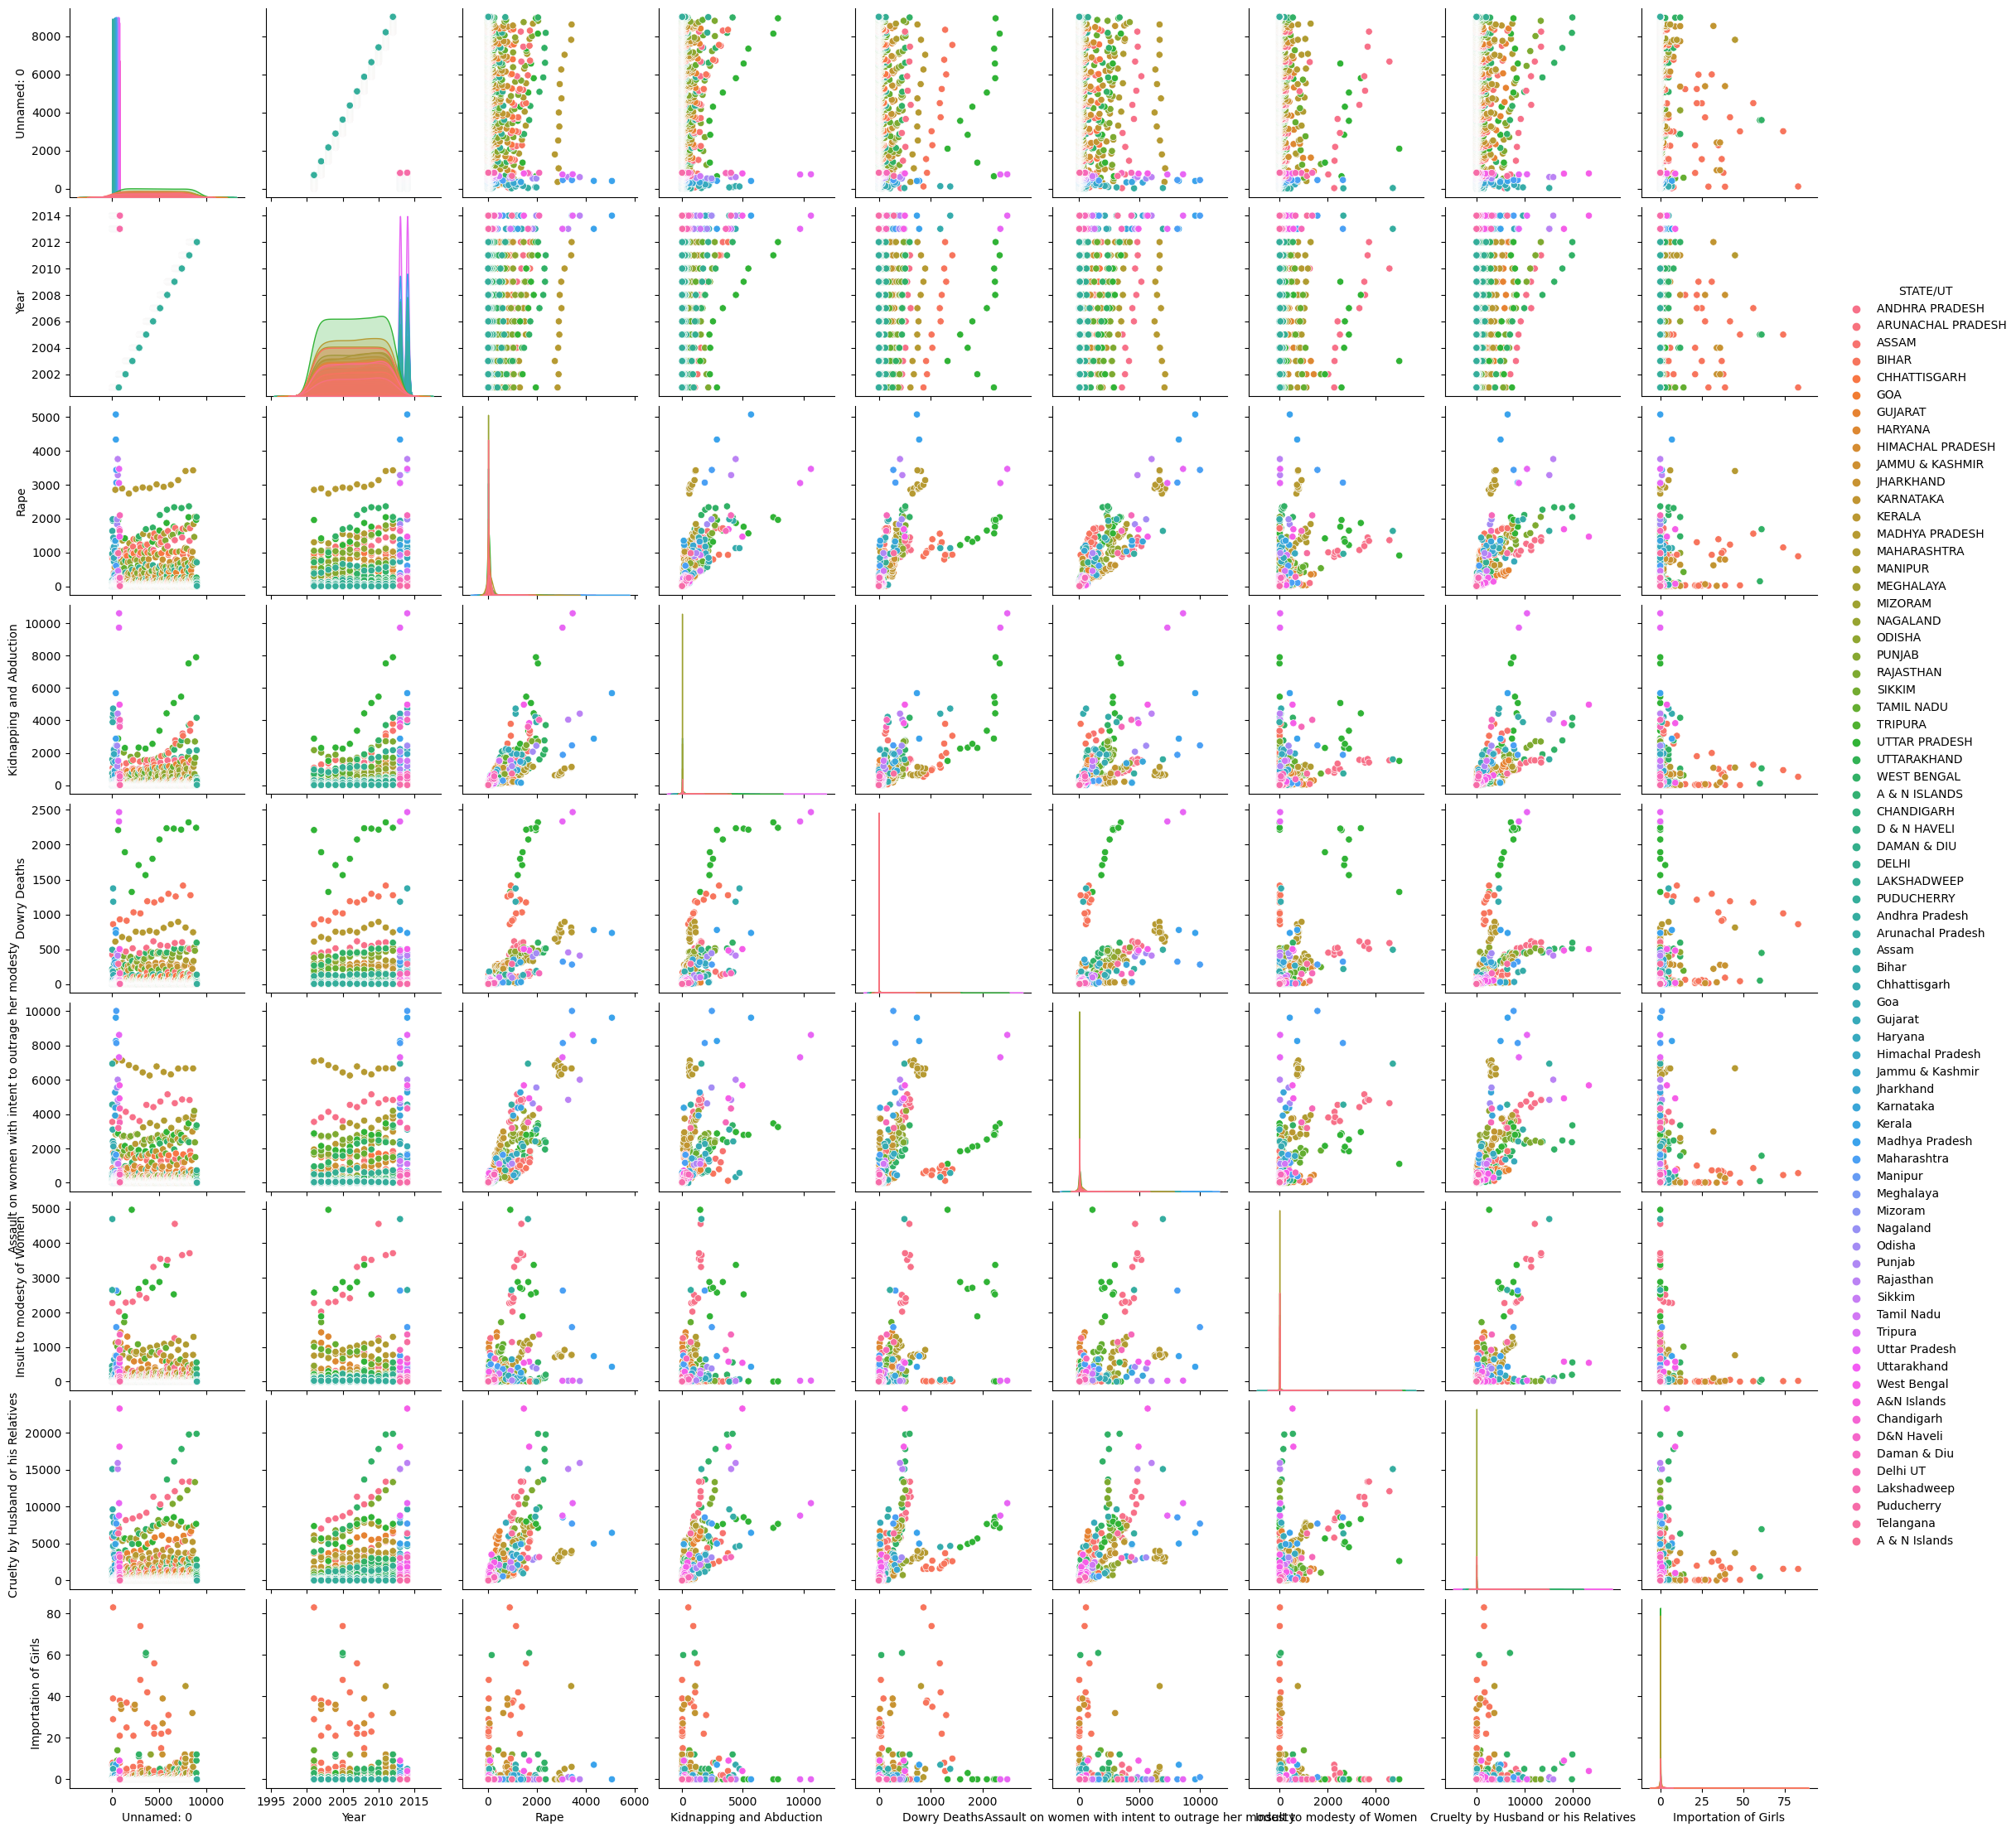

In [5]:
sns.pairplot(crime, hue='STATE/UT')

# Pie Chart

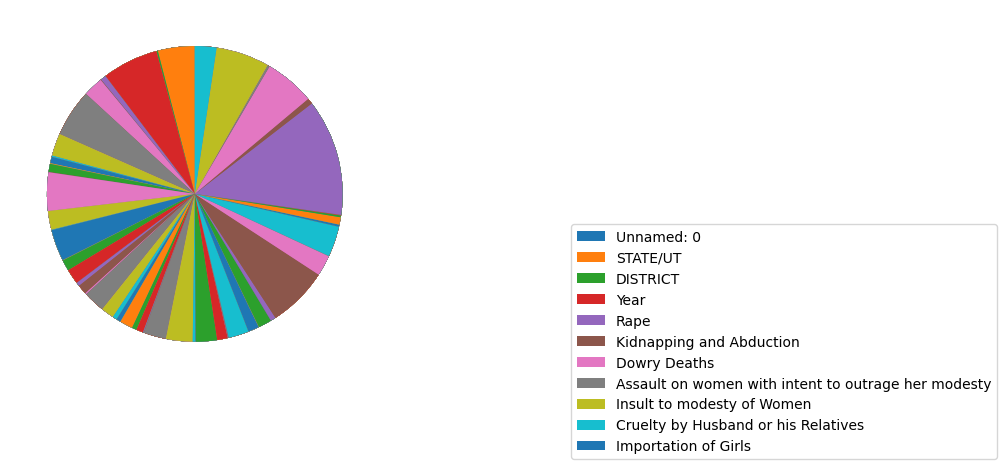

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
crime= pd.read_csv('C:\\Users\\nainc\\OneDrive\\Desktop\\crimes_against_women_2001-2014.csv')
n = 20

for i in range(n):

 patches, texts = plt.pie(crime.groupby('STATE/UT')['Kidnapping and Abduction'].sum(),
   startangle=90,
   )

plt.legend(crime,loc='center left', bbox_to_anchor=(1.5, 0.1))

plt.show()

C:\Users\nainc\AppData\Local\Temp\ipykernel_26640\2367374282.py:35: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


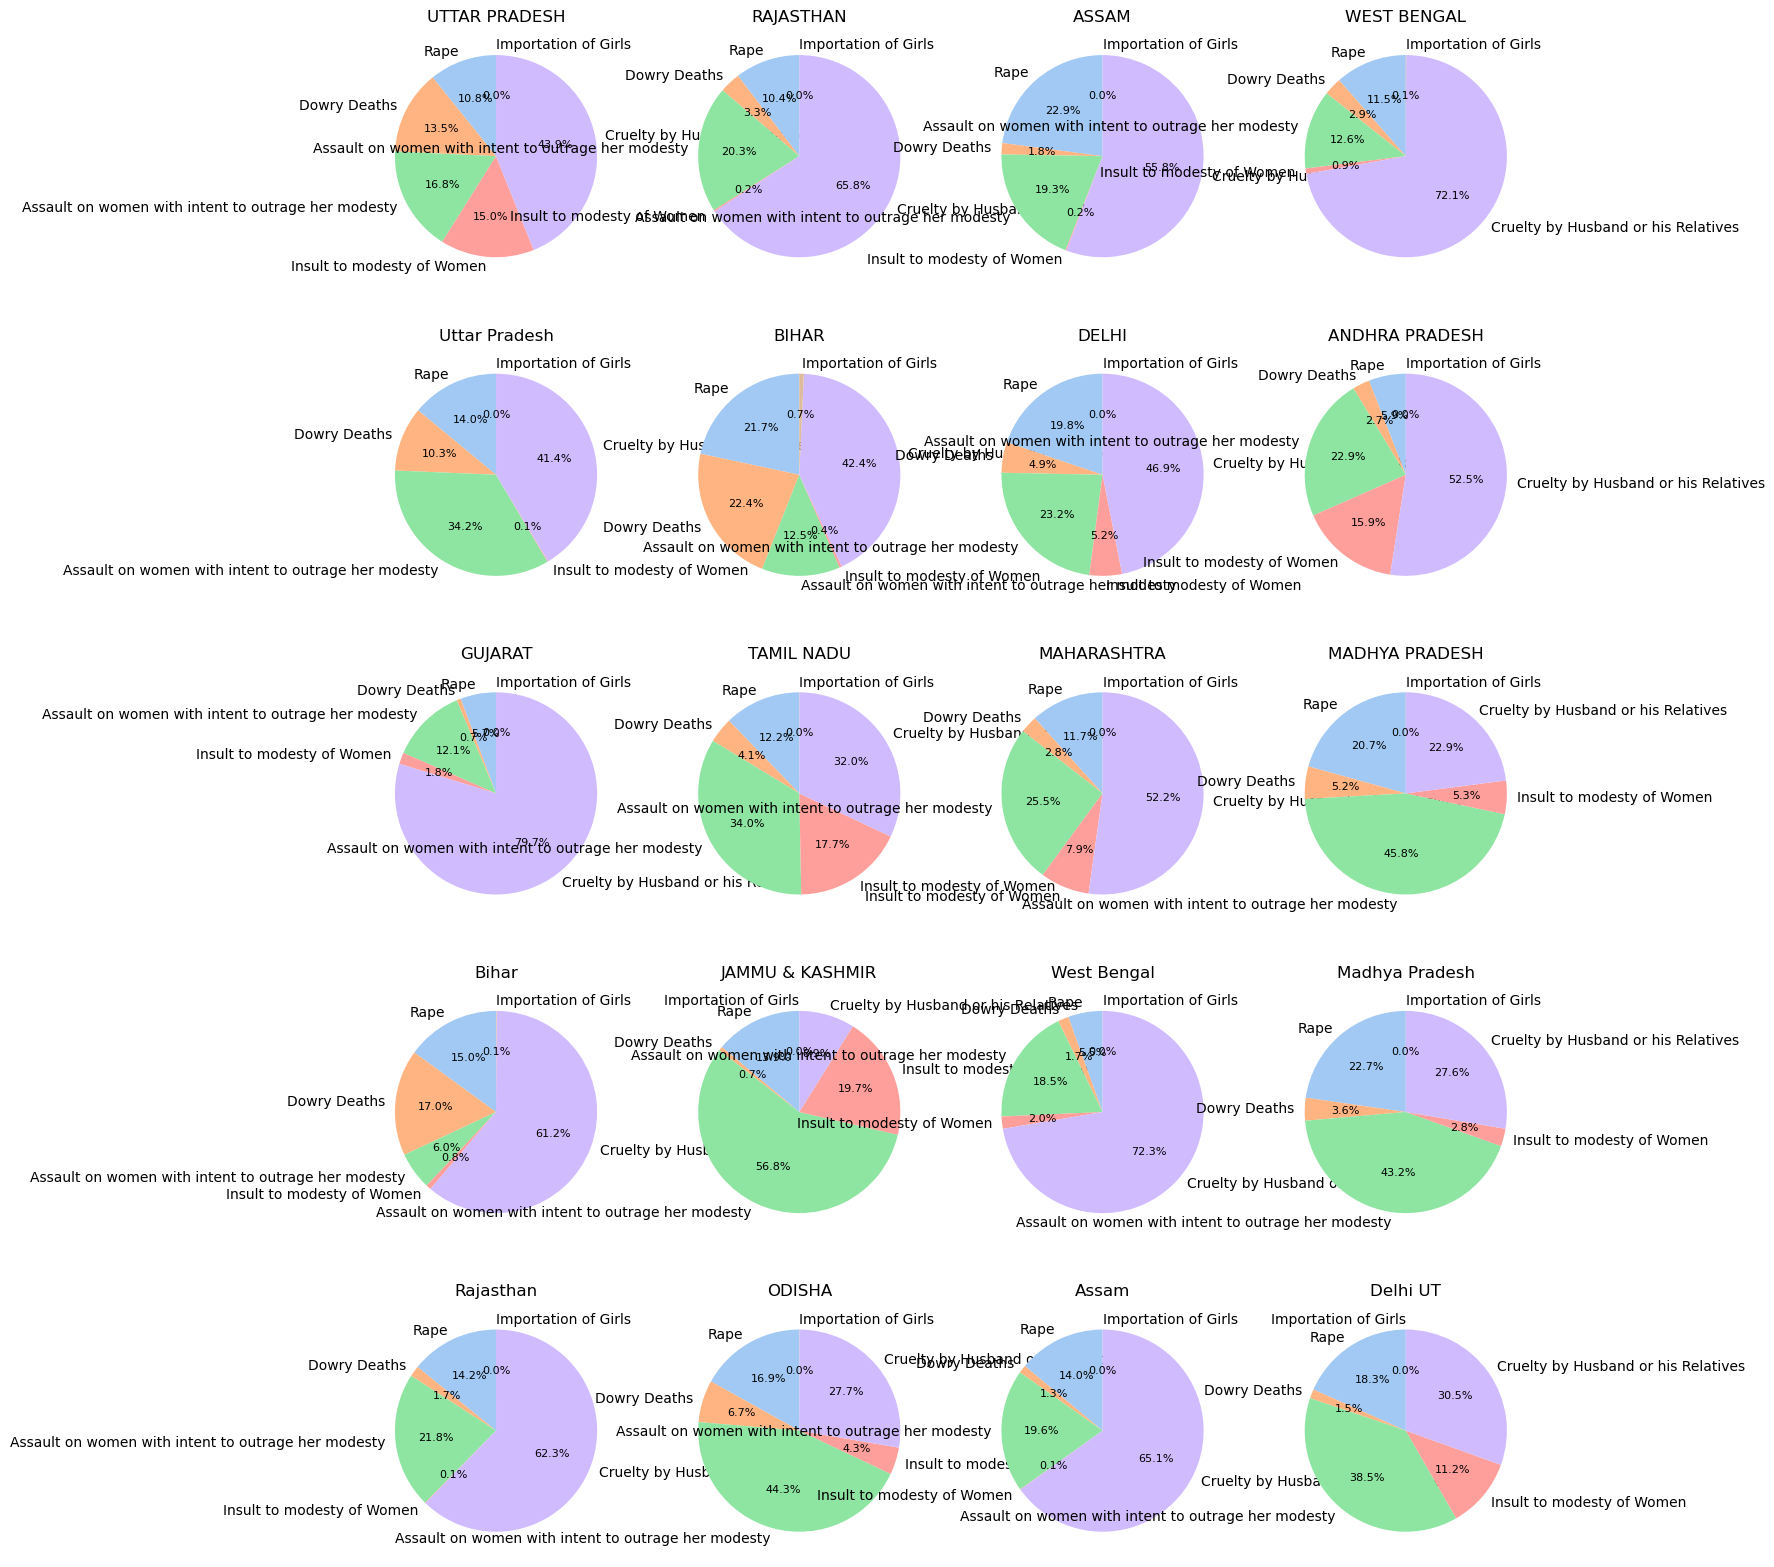

In [7]:
n = 20
top_n_states = crime.groupby('STATE/UT')['Kidnapping and Abduction'].sum().nlargest(n)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
axes = axes.flatten()
for i, (state, count) in enumerate(top_n_states.items()):
 
    state_data = crime[crime['STATE/UT'] == state]
    total_crimes = state_data[['Rape', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
                               'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
                               'Importation of Girls']].sum().sum()
   
    percentages = (state_data[['Rape', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
                               'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
                               'Importation of Girls']].sum() / total_crimes) * 100
    wedges, texts, autotexts = axes[i].pie(percentages, labels=percentages.index,
                                          colors=sns.color_palette('pastel'), startangle=90, autopct='%.1f%%')
    axes[i].set_title(state)
    for autotext in autotexts:
        autotext.set_fontsize(8)
plt.tight_layout()

plt.show()

# Boxplot

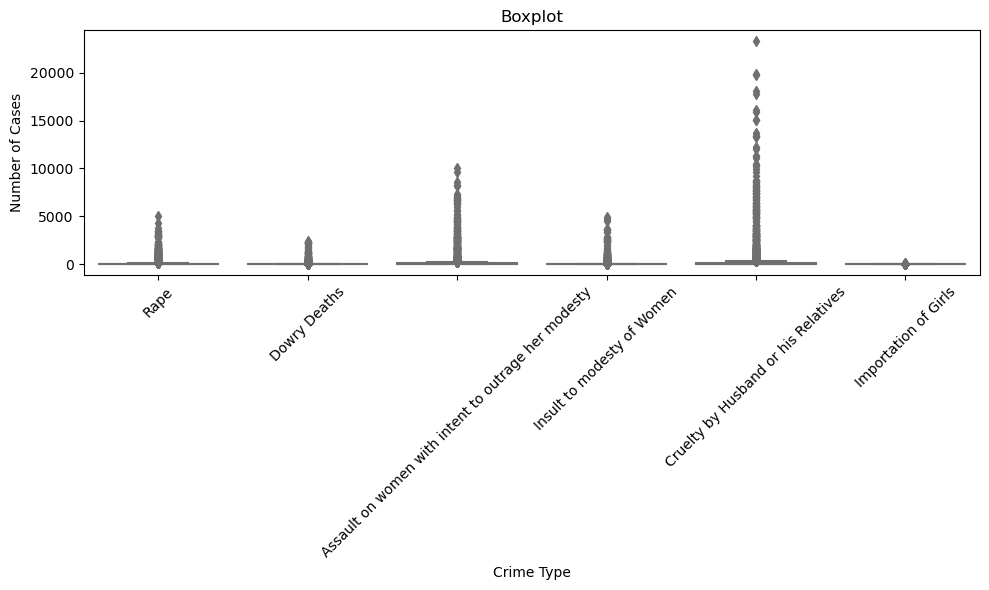

In [8]:
crime = pd.read_csv('C:\\Users\\nainc\\OneDrive\\Desktop\\crimes_against_women_2001-2014.csv')
columns_to_plot = ['Rape', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
                   'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls']
plt.figure(figsize=(10, 6))
sns.boxplot(data=crime[columns_to_plot], palette="pastel")
plt.xlabel('Crime Type')
plt.ylabel('Number of Cases')
plt.title('Boxplot')
plt.xticks(ticks=range(len(columns_to_plot)), labels=columns_to_plot, rotation=45)
plt.tight_layout()
plt.show()

# Scatterplot

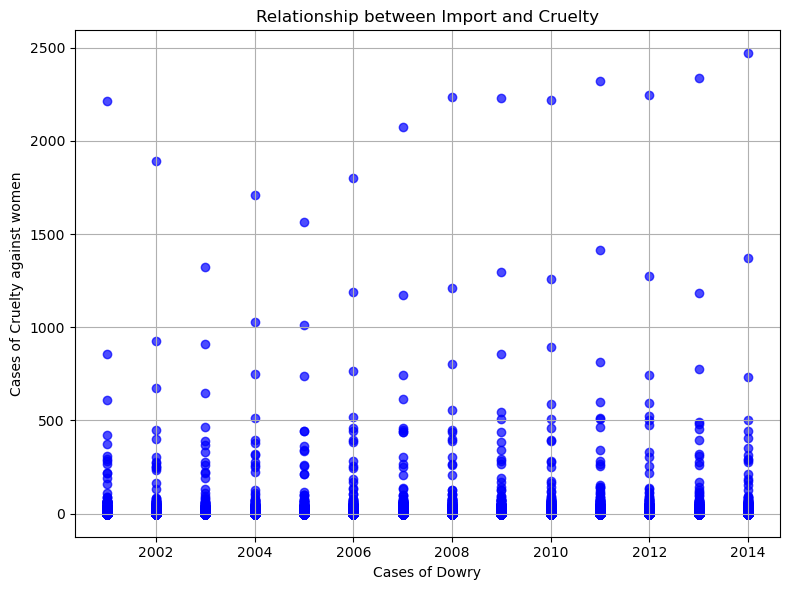

In [12]:
import_data = crime['Year']
cruelty_data = crime['Dowry Deaths']
plt.figure(figsize=(8, 6))
plt.scatter(import_data, cruelty_data, alpha=0.7, color='blue')
plt.xlabel('Cases of Dowry')
plt.ylabel('Cases of Cruelty against women')
plt.title('Relationship between Import and Cruelty')
plt.grid(True)
plt.tight_layout()
plt.show()

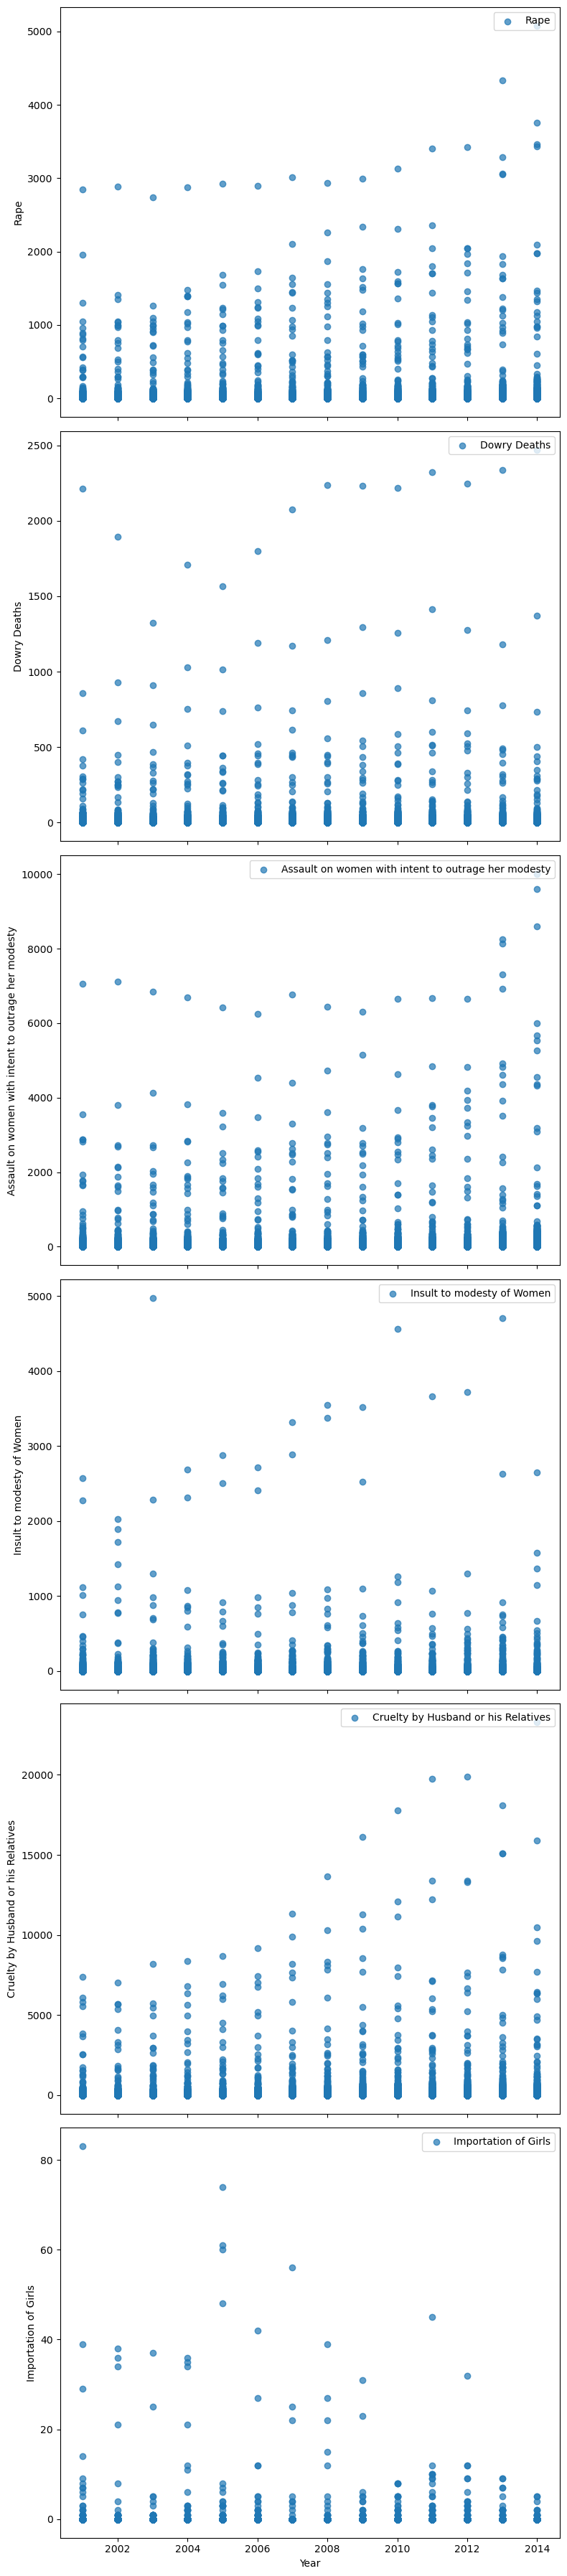

In [13]:
crime_types = ['Rape','Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls']
fig, axes = plt.subplots(nrows=len(crime_types), ncols=1, figsize=(8, 6 * len(crime_types)), sharex=True)

for i, crime_type in enumerate(crime_types):
    axes[i].scatter(crime['Year'], crime[crime_type], alpha=0.7, label=crime_type)
    axes[i].set_ylabel(crime_type)
    axes[i].legend(loc='upper right')

axes[-1].set_xlabel('Year')


plt.tight_layout()

plt.show()